In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import statsmodels.api as sm
import datetime

### Load Data

In [2]:
data_path = "data"

file_Conduvibilita = "TBaia_01m-Conducibilita.txt"
file_CTD = "TBaia_01m-CTD.txt"
file_Ossigeno = "TBaia_01m-Ossigeno.txt"
file_Winkler = "TBaia_01m-Winkler.txt"

In [3]:
def convertTime(x):
    try:
        return pd.to_datetime(x["Data"] + "/" + x["Ora(UTC)"], format="%d/%m/%Y/%H:%M:%S")
    except:
        return -1

################### Conducibilita ###################
Conducibilita_raw_df = pd.read_csv(os.path.join(data_path, file_Conduvibilita), encoding='cp1252', header=None, skiprows=11)
Conducibilita_raw_df.iloc[0, 0] = re.sub("#", "", Conducibilita_raw_df.iloc[0, 0]).strip()
Conducibilita_raw_df = Conducibilita_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
# colNames = Conducibilita_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])
colNames = Conducibilita_raw_df.iloc[0, :]

Conducibilita_raw_df.columns = colNames
Conducibilita_raw_df = Conducibilita_raw_df.iloc[1:, :]

for j in range(2, Conducibilita_raw_df.shape[1]):
    Conducibilita_raw_df.iloc[:, j] = Conducibilita_raw_df.iloc[:, j].astype(np.float32)

Conducibilita_raw_df["Time"] = Conducibilita_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
Conducibilita_raw_df["Data"] = Conducibilita_raw_df["Time"].dt.date
Conducibilita_raw_df["Ora(UTC)"] =  Conducibilita_raw_df["Time"].dt.time

################### CTD ###################

CTD_raw_df = pd.read_csv(os.path.join(data_path, file_CTD), encoding='cp1252', header=None, skiprows=15)
CTD_raw_df.iloc[0, 0] = re.sub("#", "", CTD_raw_df.iloc[0, 0]).strip()
CTD_raw_df = CTD_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
# colNames = CTD_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])
colNames = CTD_raw_df.iloc[0, :]

CTD_raw_df.columns = colNames
CTD_raw_df = CTD_raw_df.iloc[1:, :]

for j in range(2, CTD_raw_df.shape[1]):
    CTD_raw_df.iloc[:, j] = CTD_raw_df.iloc[:, j].astype(np.float32)

CTD_raw_df["Time"] = CTD_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
CTD_raw_df["Data"] = CTD_raw_df["Time"].dt.date
CTD_raw_df["Ora(UTC)"] =  CTD_raw_df["Time"].dt.time

################### Ossigeno ###################
Ossigeno_raw_df = pd.read_csv(os.path.join(data_path, file_Ossigeno), encoding='cp1252', header=None, skiprows=11)
Ossigeno_raw_df.iloc[0, 0] = re.sub("#", "", Ossigeno_raw_df.iloc[0, 0]).strip()
Ossigeno_raw_df = Ossigeno_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
# colNames = Ossigeno_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])
colNames = Ossigeno_raw_df.iloc[0, :]

Ossigeno_raw_df.columns = colNames
Ossigeno_raw_df = Ossigeno_raw_df.iloc[1:, :]

for j in range(2, Ossigeno_raw_df.shape[1]):
    Ossigeno_raw_df.iloc[:, j] = Ossigeno_raw_df.iloc[:, j].astype(np.float32)

Ossigeno_raw_df["Time"] = Ossigeno_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
Ossigeno_raw_df["Data"] = Ossigeno_raw_df["Time"].dt.date
Ossigeno_raw_df["Ora(UTC)"] =  Ossigeno_raw_df["Time"].dt.time

################### Winkler ###################
Winkler_raw_df = pd.read_csv(os.path.join(data_path, file_Winkler), encoding='cp1252', header=None, skiprows=10)
Winkler_raw_df.iloc[0, 0] = re.sub("#", "", Winkler_raw_df .iloc[0, 0]).strip()
Winkler_raw_df = Winkler_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
colNames = Winkler_raw_df.iloc[0, :]
# colNames = Winkler_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])

Winkler_raw_df.columns = colNames
Winkler_raw_df = Winkler_raw_df.iloc[1:, :]

for j in range(2,  Winkler_raw_df.shape[1]):
    Winkler_raw_df.iloc[:, j] = Winkler_raw_df.iloc[:, j].astype(np.float32)

Winkler_raw_df["Time"] = Winkler_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
Winkler_raw_df["Data"] = Winkler_raw_df["Time"].dt.date
Winkler_raw_df["Ora(UTC)"] =  Winkler_raw_df["Time"].dt.time

Ossigeno_na_df = Ossigeno_raw_df.where( Ossigeno_raw_df!=-9999, other=None )
Winkler_na_df = Winkler_raw_df.where( Winkler_raw_df!=-9999, other=None )
CTD_na_df = CTD_raw_df.where( CTD_raw_df!=-9999, other=None )
Conducibilita_na_df = Conducibilita_raw_df.where( Conducibilita_raw_df!=-9999, other=None)

In [4]:
Conducibilita_without_na_df = Conducibilita_na_df.dropna()
Ossigeno_without_na_df = Ossigeno_na_df.dropna(subset=["Ossigeno(mg/l)"])
Winkler_without_na_df = Winkler_na_df.dropna()
CTD_without_na_df = CTD_na_df.dropna(subset=["Ossigeno(mg/l)"])

In [5]:
Ossigeno_without_na_sub_df = Ossigeno_without_na_df[["Data", "Ora(UTC)", "Pressione(db)", "Ossigeno(mg/l)", "Temperatura(°C)", "Time"]]
CTD_without_na_sub_df = CTD_without_na_df[["Data", "Ora(UTC)", "Pressione(db)", "Ossigeno(mg/l)", "Temperatura(°C)", "Time"]]

In [6]:
def round_time(x):
    minute = int(round(x.minute / 30)*30)
    if minute == 60:
        if x.hour == 23:
            try:
                x = x.replace(minute=0, hour=0, day=x.day+1)
            except:
                try:
                    x = x.replace(minute=0, hour=0, day=1, month=x.month+1)
                except:
                    x = x.replace(minute=0, hour=0, day=1, month=1, year=x.year+1)
                
        else:
            x = x.replace(minute=0, hour=x.hour+1)
    else:
        x = x.replace(minute=minute)
    x = x.replace(second=0)
    return x

In [7]:
Ossigeno_without_na_sub_df["Time_rounded"] = Ossigeno_without_na_sub_df["Time"]
CTD_without_na_sub_df["Time_rounded"] = CTD_without_na_sub_df["Time"] 
Ossigeno_without_na_sub_df["Time_rounded"] = Ossigeno_without_na_sub_df["Time_rounded"].apply(lambda x: round_time(x))
CTD_without_na_sub_df["Time_rounded"] = CTD_without_na_sub_df["Time_rounded"].apply(lambda x: round_time(x))

<ipython-input-7-a352a2ba5b34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ossigeno_without_na_sub_df["Time_rounded"] = Ossigeno_without_na_sub_df["Time"]
<ipython-input-7-a352a2ba5b34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CTD_without_na_sub_df["Time_rounded"] = CTD_without_na_sub_df["Time"]
<ipython-input-7-a352a2ba5b34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [8]:
CTD_Ossigeno_df = CTD_without_na_sub_df.merge(Ossigeno_without_na_sub_df, on="Time_rounded", suffixes=("_CTD", "_Ossigeno"))

In [9]:
CTD_Ossigeno_df.head()

,Data_CTD,Ora(UTC)_CTD,Pressione(db)_CTD,Ossigeno(mg/l)_CTD,Temperatura(°C)_CTD,Time_CTD,Time_rounded,Data_Ossigeno,Ora(UTC)_Ossigeno,Pressione(db)_Ossigeno,Ossigeno(mg/l)_Ossigeno,Temperatura(°C)_Ossigeno,Time_Ossigeno
0,2021-10-07,08:35:00,1.002,6.367,21.628300,2021-10-07 08:35:00,2021-10-07 08:30:00,2021-10-07,08:30:31,0.912,6.34,21.540001,2021-10-07 08:30:31
1,2021-10-13,08:47:00,1.070,7.308,20.351999,2021-10-13 08:47:00,2021-10-13 09:00:00,2021-10-13,09:00:16,0.902,7.37,20.450001,2021-10-13 09:00:16
2,2021-10-19,08:27:00,1.296,7.040,19.583000,2021-10-19 08:27:00,2021-10-19 08:30:00,2021-10-19,08:30:06,1.229,6.82,19.700001,2021-10-19 08:30:06
3,2021-10-25,08:30:00,1.123,7.175,19.200300,2021-10-25 08:30:00,2021-10-25 08:30:00,2021-10-25,08:29:56,1.169,6.88,19.240000,2021-10-25 08:29:56
4,2021-11-03,08:40:00,0.909,7.561,18.356899,2021-11-03 08:40:00,2021-11-03 08:30:00,2021-11-03,08:29:40,1.050,6.92,18.330000,2021-11-03 08:29:40


In [10]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

In [11]:
y = CTD_Ossigeno_df["Ossigeno(mg/l)_Ossigeno"]

In [12]:
x = CTD_Ossigeno_df[["Pressione(db)_Ossigeno", "Temperatura(°C)_Ossigeno", "Pressione(db)_CTD", "Temperatura(°C)_CTD"]]
x = np.array(x)

In [ ]:
negloglik = lambda y, p_y: -p_y.log_prob(y)

# Specify the surrogate posterior over `keras.layers.Dense` `kernel` and `bias`.
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.))
    return tf.keras.Sequential([
          tfp.layers.VariableLayer(2 * n, dtype=dtype),
          tfp.layers.DistributionLambda(lambda t: tfd.Independent(
              tfd.Normal(loc=t[..., :n],
                         scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
              reinterpreted_batch_ndims=1)),
  ])
    
    # Specify the prior over `keras.layers.Dense` `kernel` and `bias`.
def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
      tfp.layers.VariableLayer(n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t, scale=1),
          reinterpreted_batch_ndims=1)),
  ])

# Build model.
# Build model.
model = tf.keras.Sequential([
  tfp.layers.DenseVariational(1 + 1, posterior_mean_field, prior_trainable, kl_weight=1/x.shape[0]),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.01 * t[...,1:]))),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=10000, verbose=True);

# Profit.
[print(np.squeeze(w.numpy())) for w in model.weights];

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 397.7344
Epoch 2/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.2209
Epoch 3/10000
1/1 [==============================] - 0s 5ms/step - loss: 455.9652
Epoch 4/10000
1/1 [==============================] - 0s 5ms/step - loss: 3622.6133
Epoch 5/10000
1/1 [==============================] - 0s 6ms/step - loss: 42.8945
Epoch 6/10000
1/1 [==============================] - 0s 5ms/step - loss: 993.8121
Epoch 7/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6560
Epoch 8/10000
1/1 [==============================] - 0s 5ms/step - loss: 828.2682
Epoch 9/10000
1/1 [==============================] - 0s 5ms/step - loss: 1382.2244
Epoch 10/10000
1/1 [==============================] - 0s 5ms/step - loss: 643.3459
Epoch 11/10000
1/1 [==============================] - 0s 5ms/step - loss: 67.7846
Epoch 12/10000
1/1 [==============================] - 0s 5ms/step - loss: 1067.7826
Epoch 13/10000
1/

In [14]:
import matplotlib.pyplot as plt

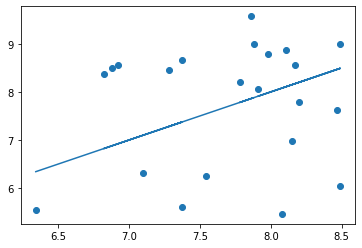

In [20]:
plt.scatter(y, model(np.array(x)).sample())
plt.plot(y, y)